In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.18 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |

In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-29 04:03:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   109MB/s    in 2.2s    

2023-04-29 04:03:21 (109 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

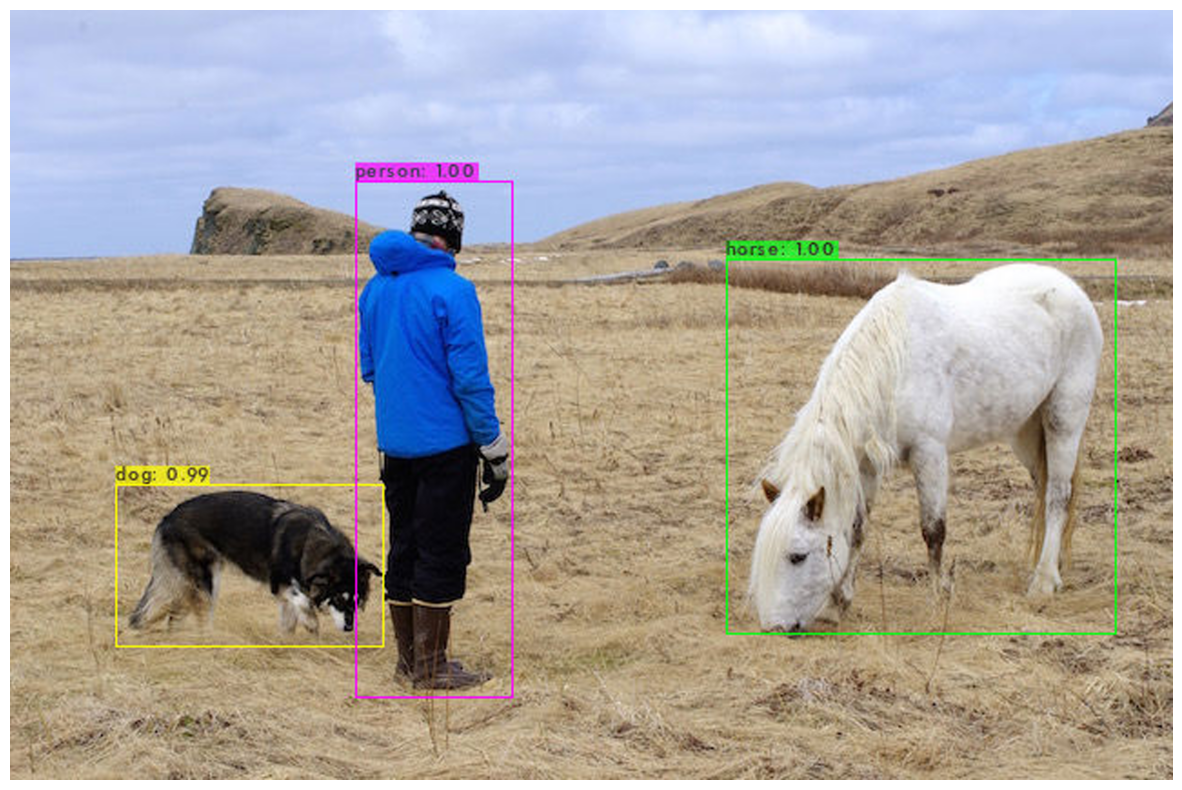

In [7]:
imShow('predictions.jpg')

In [8]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [9]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2023-1_ComputerGraphics_AboutMe_YawDarkwah.gslides
 2023-1_ComputerGraphics_SelfIntro_YawDarkwah.gslides
'Colab Notebooks'
 discrete_math.rar
'Early Exit Evolutionary NAS.gslides'
'Early Exit Evolutionary NAS.pptx'
 evariste_17_12_2019.rar
'Getting started.pdf'
 Hangman.7z
 images
 jdk11.zip
 jdk-8.rar
'M.K TM'
'My Drive'
'P2P Loan acceptance and default prediction with AI.mp4'
 paperr.7z
'pasco year1.rar'
'passco year3.rar'
'passco year4.rar'
 PHOTO-2017-03-07-19-17-16.jpg
'PHYSICS PASCO.zip'
'Practical Deep Reinforcement Learning Approach to Stock Trading.gslides'
'project (1).rar'
 project.rar
 toefl_books.rar
 VTruckService_2019_05_26.rar
 web_cms.rar
 yawDarkwahJnr_passport.PNG
 yd_passport.jpg
 yolov3


In [10]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/person.jpg

/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sho

In [11]:
!cp /mydrive/yolov3/obj.zip ../

In [12]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/00077932462df208.jpg  
  inflating: data/obj/00077932462df208.txt  
  inflating: data/obj/002c9e09733f9cb3.jpg  
  inflating: data/obj/002c9e09733f9cb3.txt  
  inflating: data/obj/002ed7cd133939ea.jpg  
  inflating: data/obj/002ed7cd133939ea.txt  
  inflating: data/obj/00476149046d3db5.jpg  
  inflating: data/obj/00476149046d3db5.txt  
  inflating: data/obj/0052cb267268c59e.jpg  
  inflating: data/obj/0052cb267268c59e.txt  
  inflating: data/obj/008de7e6e54c3fd4.jpg  
  inflating: data/obj/008de7e6e54c3fd4.txt  
  inflating: data/obj/00bb45a8568a3474.jpg  
  inflating: data/obj/00bb45a8568a3474.txt  
  inflating: data/obj/00faed7a340a1101.jpg  
  inflating: data/obj/00faed7a340a1101.txt  
  inflating: data/obj/0107395b9550040b.jpg  
  inflating: data/obj/0107395b9550040b.txt  
  inflating: data/obj/012dcf4cde4549e7.jpg  
  inflating: data/obj/012dcf4cde4549e7.txt  
  inflating: data/obj/012f5ecbf49e1da0.jpg  
  inflating

In [13]:
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [14]:
!cp /mydrive/yolov3/yolov3-custom.cfg ./cfg

In [15]:
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data ./data

In [16]:
!cp /mydrive/yolov3/generate_train.py ./

In [17]:
!python generate_train.py

In [18]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2023-04-29 04:07:05--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   107MB/s    in 1.4s    

2023-04-29 04:07:07 (107 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [19]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000014, iou_loss = 0.000000, total_loss = 0.000014 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 123729, rewritten_bbox = 37.049519 % 
]2;926/6000: loss=0.8 hours left=7.3
 926: 0.774790, 0.972932 avg loss, 0.000735 rate, 3.004885 seconds, 59264 images, 7.334354 hours left
Loaded: 0.000084 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.760194), count: 5, class_loss = 1.147473, iou_loss = 0.266570, total_loss = 1.414042 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000429, iou_loss = 0.000000, total_loss = 0.000429 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

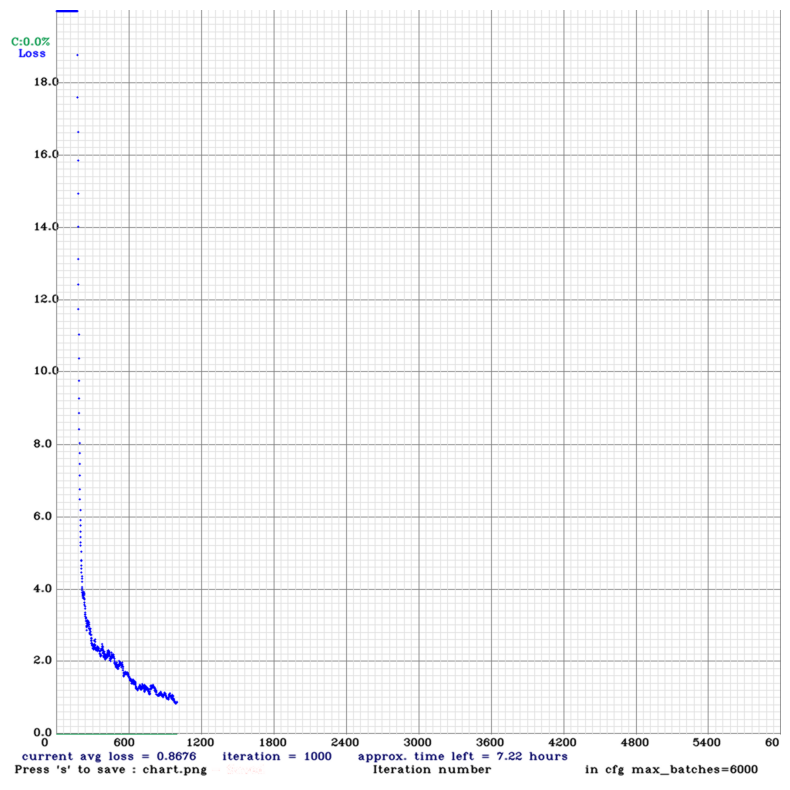

In [20]:
imShow('chart.png')

In [21]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

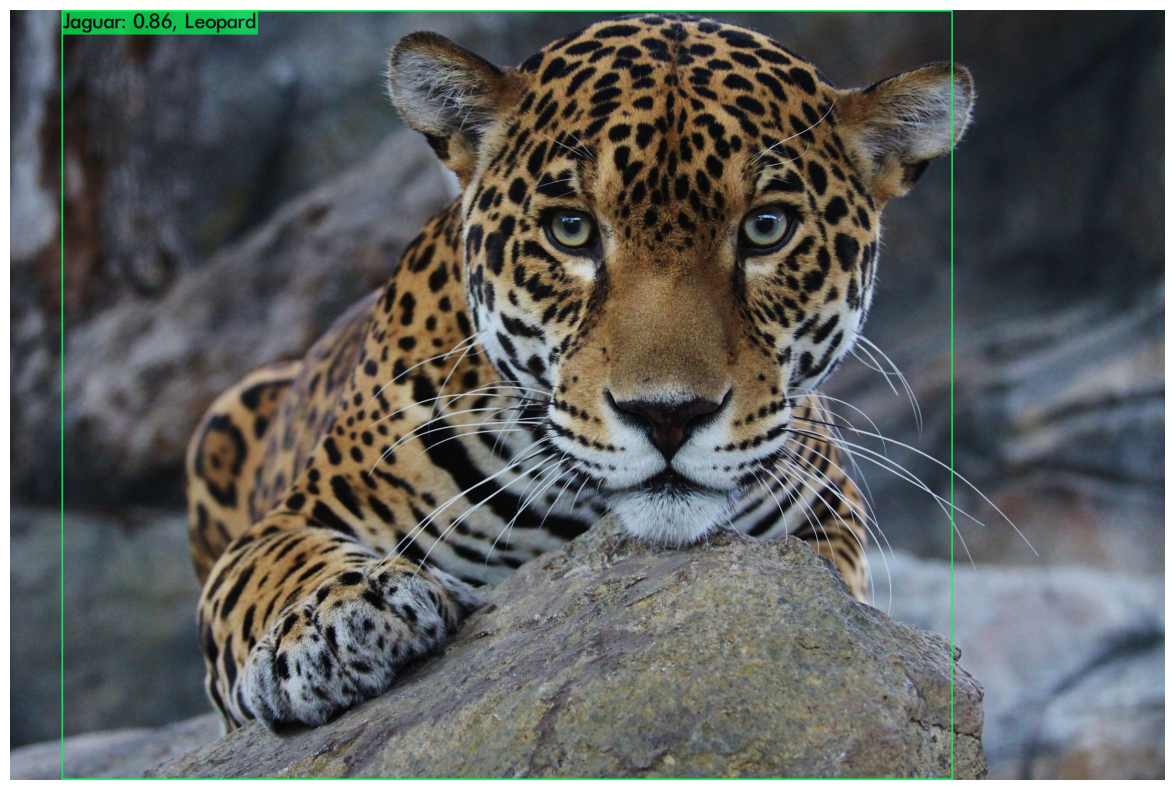

In [25]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-custom_last.weights /mydrive/images/jaguar.jpg -thresh 0.3
imShow('predictions.jpg')